<a href="https://colab.research.google.com/github/prilllia/tugas_UAS/blob/main/UAS_Praktik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# MENAMPILKAN DATASET

In [3]:
# Load dataset
data = pd.read_csv("/content/Covid Dataset.csv")

# Lihat 5 data pertama
display(data.head())

# Cek struktur data
data.info()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

# MENAMPILKAN JUMLAH DATASET DAN FITUR

In [4]:
# preview the dataset

data.shape

(5434, 21)

In [7]:
# preview the dataset

data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [8]:
col_names = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat','Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue', 'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market', 'COVID-19']

data.columns = col_names

data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
       'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [9]:
# let's agian preview the dataset

data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


# DISTRIBUSI KELAS TARGET

In [5]:
# Tentukan fitur dan label
# Clean column names to remove leading/trailing spaces, etc.
data.columns = data.columns.str.strip()

X = data[['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat','Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue', 'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market']]
y = data['COVID-19']

# Encode label menjadi angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Cek hasil encoding
print("Contoh encoding:", list(zip(y[:5], y_encoded[:5])))

Contoh encoding: [('Yes', np.int64(1)), ('Yes', np.int64(1)), ('Yes', np.int64(1)), ('Yes', np.int64(1)), ('Yes', np.int64(1))]


In [10]:
for var in data.columns:

    print(data[var].value_counts())

Breathing Problem
Yes    3620
No     1814
Name: count, dtype: int64
Fever
Yes    4273
No     1161
Name: count, dtype: int64
Dry Cough
Yes    4307
No     1127
Name: count, dtype: int64
Sore throat
Yes    3953
No     1481
Name: count, dtype: int64
Running Nose
Yes    2952
No     2482
Name: count, dtype: int64
Asthma
No     2920
Yes    2514
Name: count, dtype: int64
Chronic Lung Disease
No     2869
Yes    2565
Name: count, dtype: int64
Headache
Yes    2736
No     2698
Name: count, dtype: int64
Heart Disease
No     2911
Yes    2523
Name: count, dtype: int64
Diabetes
No     2846
Yes    2588
Name: count, dtype: int64
Hyper Tension
No     2771
Yes    2663
Name: count, dtype: int64
Fatigue
Yes    2821
No     2613
Name: count, dtype: int64
Gastrointestinal
No     2883
Yes    2551
Name: count, dtype: int64
Abroad travel
No     2983
Yes    2451
Name: count, dtype: int64
Contact with COVID Patient
Yes    2726
No     2708
Name: count, dtype: int64
Attended Large Gathering
No     2924
Yes    2510
Na

In [11]:
# Cek distribusi sebelum SMOTE
print("=== Distribusi Sebelum Balancing ===")
print(pd.Series(y_encoded).value_counts())

# Convert all 'Yes'/'No' values in X to 1/0
# This ensures all feature columns are numerical before SMOTE.
X_processed = X.copy() # Create a copy to avoid potential SettingWithCopyWarning
for col in X_processed.columns:
    X_processed[col] = X_processed[col].map({'Yes': 1, 'No': 0})

# Now X_processed contains only 0s and 1s, and is fully numerical.
X_encoded = X_processed # Rename for consistency with original variable name

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

# Cek distribusi setelah SMOTE
print("\n=== Distribusi Setelah SMOTE ===")
print(pd.Series(y_resampled).value_counts())

# Combine the resampled data back into a DataFrame
# Note: X_resampled is a numpy array after SMOTE, so we convert it back to DataFrame
balanced_data = pd.DataFrame(X_resampled, columns=X_encoded.columns)
# The target label was 'COVID-19'
balanced_data['COVID-19'] = le.inverse_transform(y_resampled)

# Simpan ke Excel
output_path = "Covid_balanced_data_example.xlsx"
balanced_data.to_excel(output_path, index=False)

=== Distribusi Sebelum Balancing ===
1    4383
0    1051
Name: count, dtype: int64

=== Distribusi Setelah SMOTE ===
1    4383
0    4383
Name: count, dtype: int64


# MEMBAGI DATA TRAINING DAN TESTING

In [13]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((4347, 20), (1087, 20))

# FEATURE SCALING

In [28]:
cols = X_encoded.columns

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [31]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [32]:
X_train.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
0,-1.001999,-1.428553,-1.362429,-1.113989,0.925207,-0.878918,-0.986402,0.982750,1.088312,1.077433,-0.895605,0.928398,1.064543,-0.627060,-0.752481,-0.673473,-0.953177,1.351399,0.0,0.0
1,-1.001999,0.700009,-1.362429,0.897675,0.925207,-0.878918,1.013786,-1.017553,-0.918854,1.077433,1.116564,0.928398,-0.939370,-0.627060,-0.752481,-0.673473,-0.953177,1.351399,0.0,0.0
2,0.998005,0.700009,0.733983,0.897675,0.925207,1.137762,1.013786,0.982750,-0.918854,1.077433,-0.895605,0.928398,1.064543,1.594742,-0.752481,1.484841,-0.953177,-0.739974,0.0,0.0
3,-1.001999,-1.428553,-1.362429,-1.113989,0.925207,1.137762,-0.986402,0.982750,1.088312,1.077433,-0.895605,-1.077124,-0.939370,-0.627060,-0.752481,1.484841,-0.953177,-0.739974,0.0,0.0
4,-1.001999,0.700009,-1.362429,0.897675,0.925207,-0.878918,1.013786,-1.017553,1.088312,1.077433,1.116564,-1.077124,1.064543,-0.627060,-0.752481,-0.673473,-0.953177,-0.739974,0.0,0.0


# IMPLEMENTASI MODEL KNN

In [50]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier()

# LATIH MODEL & LAKUKAN PREDIKSI

In [34]:
y_pred = knn.predict(X_test)

y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [35]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([1., 0., 0., ..., 0., 1., 1.])

In [36]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([0., 1., 1., ..., 1., 0., 0.])

# ACCURACY, PRECISION, RECALL DAN F1-SCORE

=== HASIL EVALUASI ===
Akurasi: 98.92%

Classification Report:
               precision    recall  f1-score   support

          No       0.98      1.00      0.99       894
         Yes       1.00      0.98      0.99       860

    accuracy                           0.99      1754
   macro avg       0.99      0.99      0.99      1754
weighted avg       0.99      0.99      0.99      1754



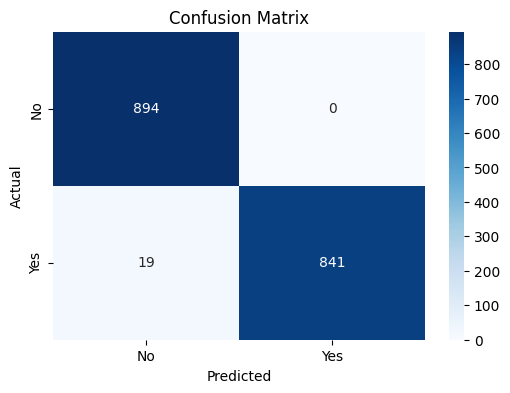

In [40]:
# Prediksi data uji
y_pred = knn.predict(X_test)

# Evaluasi hasil
print("=== HASIL EVALUASI ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))

# Confusion Matrix visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(cls) for cls in le.classes_], yticklabels=[str(cls) for cls in le.classes_])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


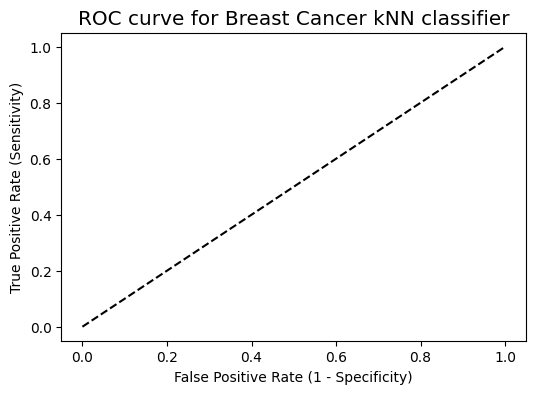

In [49]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()